# 8.4.1 Estimacion de densidades

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

import warnings
warnings.filterwarnings("ignore")

Link: https://youtu.be/38791TikK_Y?si=KwDnal2ki66kQPpv

Links: https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

Esta metodología implementa la aproximación de la función de densidad de probabilidad para distribuciones de $N$ dimensiones como:

$$ ρK(y) = \sum_{i=1}^{N} K(y − x-i; h) $$

- $y$ es el punto para el cual se va a estimar la probabilidad.
- $x_i$ es cada uno de los puntos de la muestra de datos.
- $h$ es el ancho de banda del kernel.

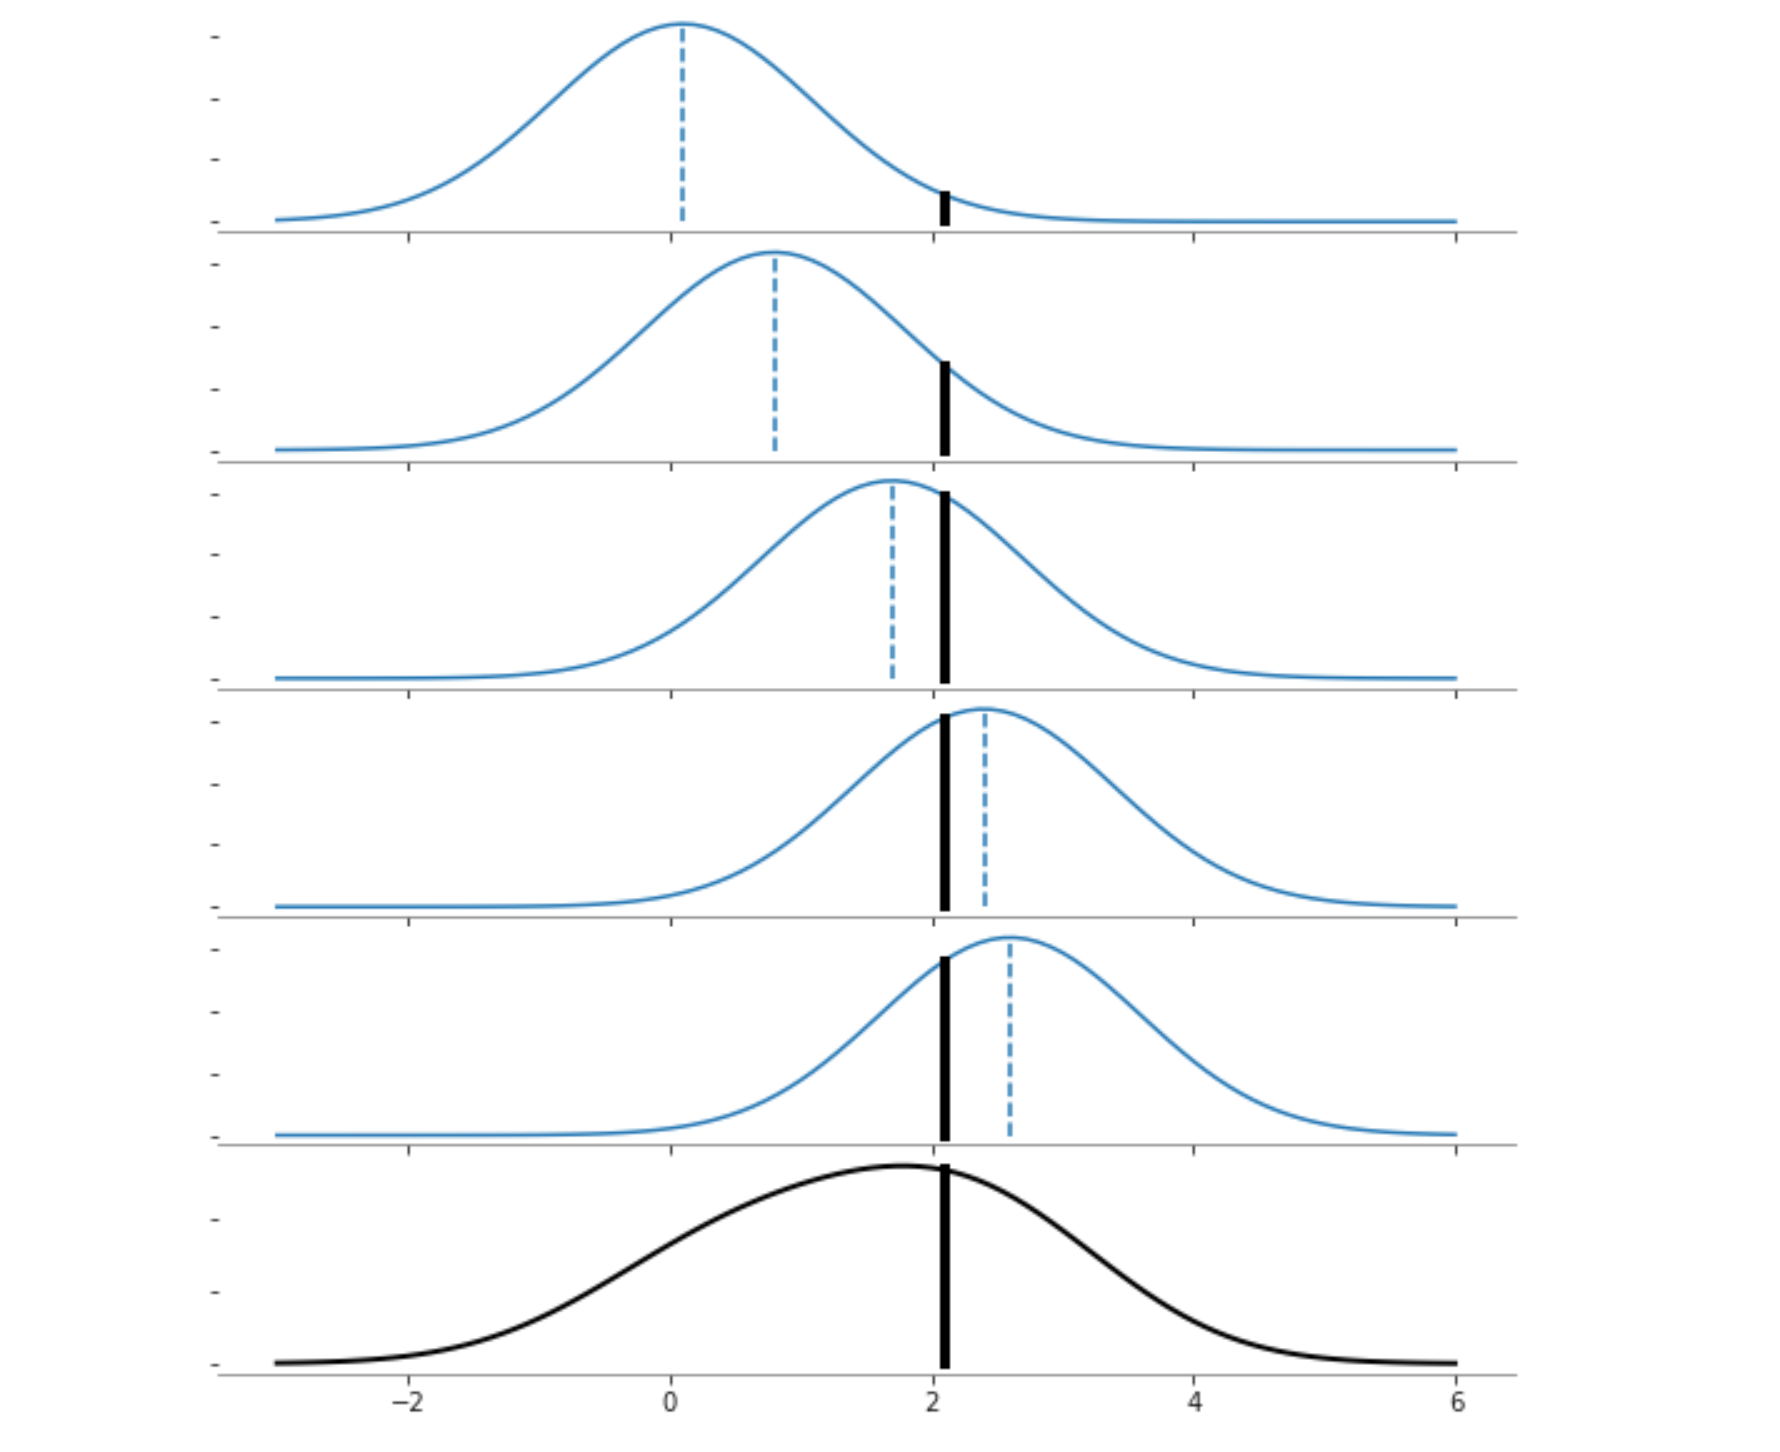

Los kernels implementados son los siguientes:

- gaussian:

$$ K(x,h) \propto exp(\frac{−x^2}{2h}) $$

- tophat:

$$ K(x,h) \propto 1 \ if \ x<h $$

- epanechnikov:

$$ K(x,h) \propto 1−\frac{x^2}{h^2} $$

- exponential:

$$ K(x,h) \propto exp(\frac{−x}{h}) $$

- linear:

$$ K(x,h) \propto 1 − \frac{x}{h} \ if \ x<h $$

- cosine:

$$ K(x,h) \propto cos(\frac{πx}{2h}) \ if \ x<h $$

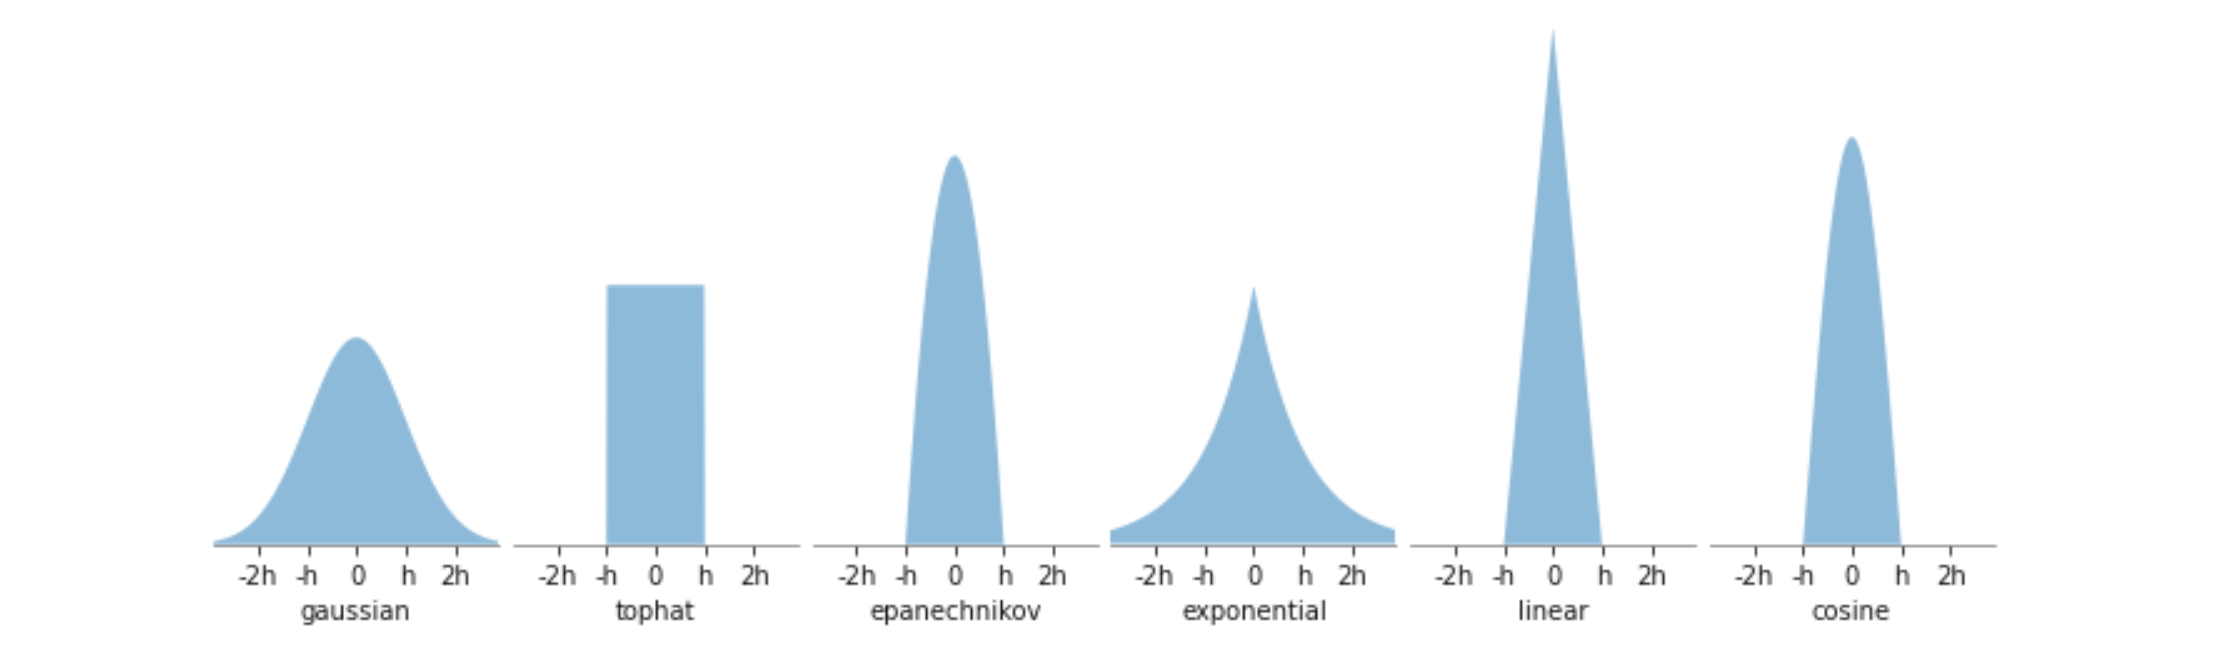

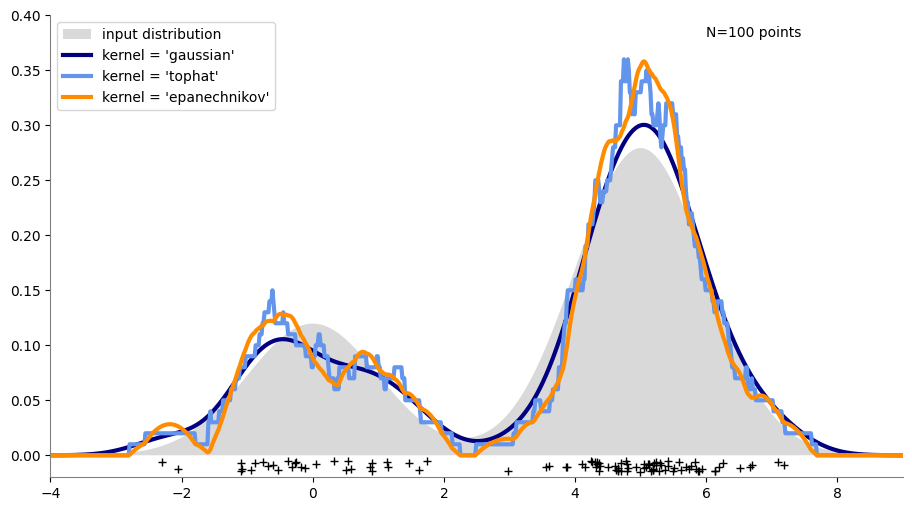

In [4]:
n_points = 100
np.random.seed(1)
X = np.concatenate(
    (
        np.random.normal(0, 1, int(0.3 * n_points)),
        np.random.normal(5, 1, int(0.7 * n_points)),
    )
)[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = 0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0])

fig, ax = plt.subplots(figsize=(11, 6))

ax.fill(
    X_plot[:, 0],
    true_dens,
    fc="black",
    alpha=0.15,
    label="input distribution",
)
colors = ["navy", "cornflowerblue", "darkorange"]
kernels = ["gaussian", "tophat", "epanechnikov"]
lw = 3

for color, kernel in zip(colors, kernels):

    kernelDensity = KernelDensity(
        kernel=kernel,
        bandwidth=0.5,
    ).fit(X)

    log_dens = kernelDensity.score_samples(X_plot)

    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )
    ax.spines["left"].set_color("gray")
    ax.spines["bottom"].set_color("gray")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

ax.text(6, 0.38, "N={0} points".format(n_points))

ax.legend(loc="upper left")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), "+k")

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

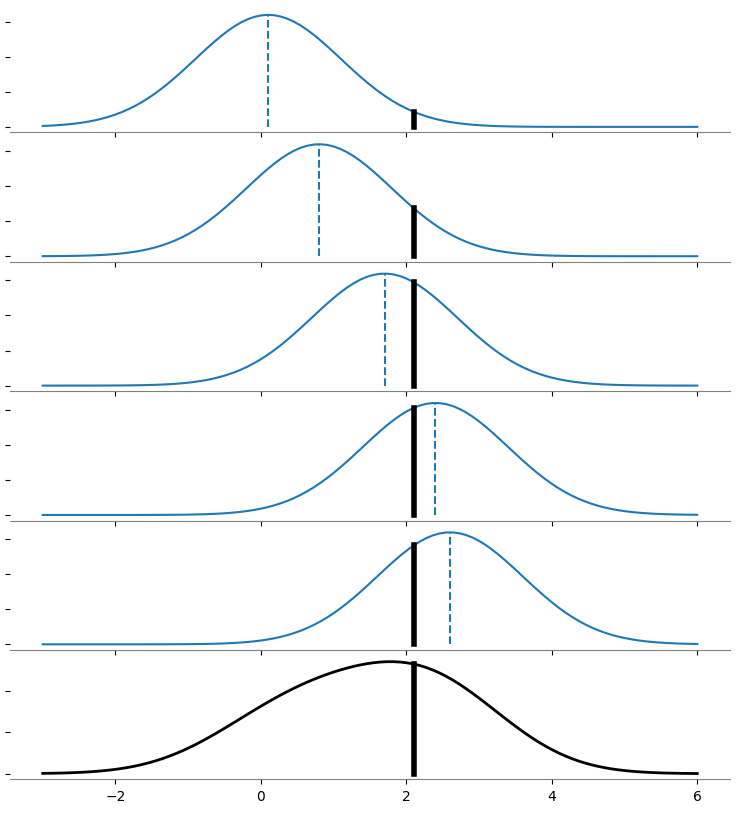

In [5]:
def figura_auxiliar1():
    def format_plot(i_plot):
        ax[i_plot].spines["left"].set_visible(False)
        ax[i_plot].spines["bottom"].set_color("gray")
        ax[i_plot].spines["top"].set_visible(False)
        ax[i_plot].spines["right"].set_visible(False)
        plt.setp(ax[i_plot].get_yticklabels(), visible=False)

    x_data = np.array([[0.1], [0.8], [1.7], [2.4], [2.6]])
    n_points = len(x_data)

    x_plot = np.linspace(-3, 6, 100)[:, None]
    x_new = 2.1

    fig, ax = plt.subplots(6, 1, sharex=True, figsize=(8, 10))
    fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)

    for i_plot in range(n_points):

        kernelDensity = KernelDensity(kernel="gaussian").fit([x_data[i_plot]])
        log_dens = kernelDensity.score_samples(x_plot)
        ax[i_plot].plot(x_plot, np.exp(log_dens) / 5, "-", color="tab:blue")

        log_den = kernelDensity.score_samples([[x_new]])
        ax[i_plot].plot([x_new, x_new], [0, np.exp(log_den[0]) / 5], "-k", linewidth=4)
        format_plot(i_plot)

        log_den = kernelDensity.score_samples([x_data[i_plot]])
        ax[i_plot].plot(
            [x_data[i_plot], x_data[i_plot]],
            [0, np.exp(log_den[0]) / 5],
            "--",
            color="tab:blue",
        )
        format_plot(i_plot)

    kernelDensity = KernelDensity(kernel="gaussian").fit(x_data)
    log_dens = kernelDensity.score_samples(x_plot)

    ax[5].plot(x_plot, np.exp(log_dens), "-", color="k", linewidth=2)
    log_den = kernelDensity.score_samples([[x_new]])
    ax[5].plot([x_new, x_new], [0, np.exp(log_den[0])], "-k", linewidth=4)

    format_plot(5)
    plt.show()


figura_auxiliar1()

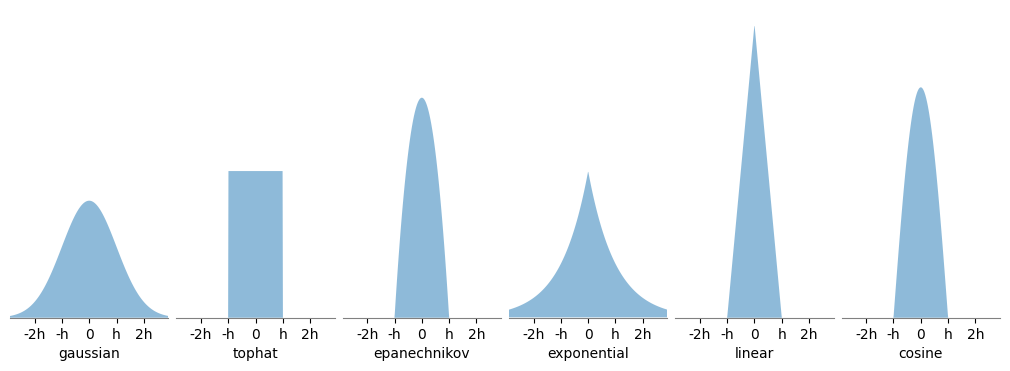

In [6]:
def figura_auxiliar_2():
    def format_plot(i_plot):
        ax[i_plot].spines["left"].set_visible(False)
        ax[i_plot].spines["bottom"].set_color("gray")
        ax[i_plot].spines["top"].set_visible(False)
        ax[i_plot].spines["right"].set_visible(False)
        plt.setp(ax[i_plot].get_yticklabels(), visible=False)

    # Plot all available kernels
    X_plot = np.linspace(-6, 6, 1000)[:, None]
    X_src = np.zeros((1, 1))

    fig, ax = plt.subplots(1, 6, sharex=True, sharey=True, figsize=(11, 4))
    fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)

    def format_func(x, loc):
        if x == 0:
            return "0"
        elif x == 1:
            return "h"
        elif x == -1:
            return "-h"
        else:
            return "%ih" % x

    for i, kernel in enumerate(
        ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"]
    ):
        axi = ax.ravel()[i]
        log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
        axi.fill(X_plot[:, 0], np.exp(log_dens), "-k", fc="tab:blue", alpha=0.5)
        axi.set_xlabel(kernel)

        axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
        axi.xaxis.set_major_locator(plt.MultipleLocator(1))
        axi.yaxis.set_major_locator(plt.NullLocator())

        axi.set_ylim(0, 1.05)
        axi.set_xlim(-2.9, 2.9)

        format_plot(i)


figura_auxiliar_2()

In [7]:
print('ok_')

ok_
